In [90]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import stylecloud
from stop_words import get_stop_words

In [2]:
survey = pd.read_csv("church_survey.csv")
survey

,ID,Type,Timestamp,Age,Age Group,Cohort,Attend,Attend Group,Gender,1A,...,1G,1H,2,3,4,5,6,7,8,9
0,1,Online,2020/10/18 7:58:21 PM EST,62,6,Boomer,15.0,6,M,1,...,5,2,cannot think of anything,ways to serve the community,e,a;b;c,d;h,preparing upcoming generations to take over,yes. has potential,"clear, applicable Bible teaching"
1,2,Online,2020/10/19 11:33:36 AM EST,69,7,Boomer,4.0,3,F,1,...,1,1,More personal interaction with the congregation,Allowed time for testimonies and spoken prayer...,a,f;e,c;h,Larger attendance & bringing more lost souls t...,Yes because we love God's people,A pastor who preaches through the spirit of th...
2,3,Online,2020/10/19 12:35:40 PM EST,73,7,Boomer,4.0,3,M,1,...,2,2,NaN,Personal welcoming of new visitors.,a;c;e,a;h,f;h,Full capacity of the sanctuary,Yes. Welcoming atmosphere by the congregation.,A person who will keep your mind on the sermon...
3,4,Online,2020/10/19 3:21:32 PM EST,71,7,Boomer,55.0,9,F,5,...,5,5,Long friendships,Worship was more inclusive of congregation. M...,h,c;i;e,c;e,Either thriving or barely surviving,No. Too unstable at this time.,"Someone with vision and drive, not just fillin..."
4,5,Online,2020/10/19 3:48:56 PM EST,72,7,Boomer,50.0,9,M,2,...,2,4,NaN,Excellent Worship Services enhanced by Worsh...,h,b;c;h,c;d,Strong Pastoral leadership that will assist in...,Not sure. If we continue with the type of mini...,Think outside the box. Don’t limit your search...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67,68,Paper,2020/11/14,86,8,Silent Gen,21.0,7,F,1,...,1,1,NaN,NaN,a;b;c,a;f,b;h,NaN,NaN,NaN
68,69,Paper,2020/11/14,67,7,Boomer,10.0,5,F,1,...,2,3,NaN,NaN,a,b;f;h,g;h,NaN,NaN,NaN
69,70,Paper,2020/11/14,71,7,Boomer,30.0,8,F,1,...,1,2,NaN,NaN,g,a;b;g,f;h,NaN,NaN,NaN
70,71,Paper,2020/11/14,12,1,Zoomer,12.0,5,F,2,...,2,2,NaN,NaN,a,a;b;h,f;g;h,NaN,NaN,NaN


In [3]:
survey.describe()

,ID,Age,Age Group,Attend,Attend Group,1A,1B,1C,1D,1E,1F,1G,1H
count,72.00000,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.00000,72.000000,72.000000,72.000000,72.000000
mean,36.50000,59.236111,5.930556,15.902778,4.833333,1.888889,2.138889,1.708333,2.62500,2.263889,1.986111,2.222222,2.263889
std,20.92845,21.007372,1.988179,15.615152,2.848276,1.216733,1.202176,0.895018,1.27199,1.233260,1.041303,1.386273,1.255894
min,1.00000,-1.000000,0.000000,-1.000000,0.000000,0.000000,1.000000,0.000000,0.00000,1.000000,0.000000,1.000000,1.000000
25%,18.75000,51.500000,5.000000,3.875000,3.000000,1.000000,1.000000,1.000000,2.00000,1.750000,1.000000,1.000000,1.000000
50%,36.50000,66.000000,7.000000,11.000000,5.000000,2.000000,2.000000,2.000000,2.00000,2.000000,2.000000,2.000000,2.000000
75%,54.25000,71.000000,7.000000,29.125000,7.000000,2.000000,2.000000,2.000000,3.00000,2.000000,2.000000,2.000000,3.000000
max,72.00000,93.000000,8.000000,55.000000,9.000000,5.000000,5.000000,5.000000,5.00000,5.000000,5.000000,5.000000,5.000000


In [4]:
survey.dtypes

ID                int64
Type             object
Timestamp        object
Age               int64
Age Group         int64
Cohort           object
Attend          float64
Attend Group      int64
Gender           object
1A                int64
1B                int64
1C                int64
1D                int64
1E                int64
1F                int64
1G                int64
1H                int64
2                object
3                object
4                object
5                object
6                object
7                object
8                object
9                object
dtype: object

In [5]:
print(survey[["1A", "1B", "1C", "1D", "1E", "1F", "1G"]])

survey.loc[survey["1B"].between(3, 5), "1B"] += 1
survey.loc[survey["1C"].between(3, 5), "1C"] += 1
survey.loc[survey["1D"].between(3, 5), "1D"] += 1
survey.loc[survey["1E"].between(3, 5), "1E"] += 1
survey.loc[survey["1F"].between(3, 5), "1F"] += 1
survey.loc[survey["1G"].between(3, 5), "1G"] += 1
survey.loc[survey["1H"].between(3, 5), "1H"] += 1
survey.loc[survey["1A"] == 6, "1A"] = 3
survey.loc[survey["1B"] == 6, "1B"] = 3
survey.loc[survey["1C"] == 6, "1C"] = 3
survey.loc[survey["1D"] == 6, "1D"] = 3
survey.loc[survey["1E"] == 6, "1E"] = 3
survey.loc[survey["1F"] == 6, "1F"] = 3
survey.loc[survey["1G"] == 6, "1G"] = 3
survey.loc[survey["1H"] == 6, "1H"] = 3

    1A  1B  1C  1D  1E  1F  1G
0    1   2   2   5   3   5   5
1    1   1   1   1   1   1   1
2    1   2   1   1   1   1   2
3    5   5   2   4   2   2   5
4    2   5   1   3   3   2   2
..  ..  ..  ..  ..  ..  ..  ..
67   1   1   2   2   2   1   1
68   1   1   1   2   2   2   2
69   1   1   1   2   2   2   1
70   2   2   1   2   1   2   2
71   1   1   0   2   1   1   1

[72 rows x 7 columns]


In [6]:
response_1 = ["A", "B", "C", "D", "E", "F", "G", "H"]
response_4 = ["a", "b", "c", "d", "e", "f", "g", "h"]
response_5 = ["a", "b", "c", "d", "e", "f", "g", "h", "i"]
response_6 = response_4

for res in response_4:
    survey["4" + res] = survey["4"].str.contains(res)
    
for res in response_5:
    survey["5" + res] = survey["5"].str.contains(res)
    
for res in response_6:
    survey["6" + res] = survey["6"].str.contains(res)

In [7]:
survey.loc[survey["Age"] == -1, "Age"] = np.nan
survey.loc[survey["Attend"] == -1, "Attend"] = np.nan

In [8]:
cohort_mean_age = survey.pivot_table(values="Age", index="Cohort")
cohort_mean_age.reset_index(inplace=True)
cohort_mean_age

,Cohort,Age
0,Boomer,67.805556
1,Gen X,51.000000
2,Millenial,25.666667
3,Silent Gen,84.500000
4,Zoomer,12.000000


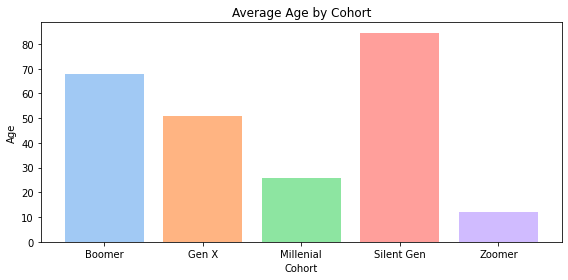

In [9]:
plt.figure(figsize=(8,4), tight_layout=True)

colors = sns.color_palette("pastel")

plt.bar(cohort_mean_age["Cohort"], cohort_mean_age["Age"], color=colors[:5])
plt.xlabel("Cohort")
plt.ylabel("Age")
plt.title("Average Age by Cohort")
plt.show()

In [10]:
cohort_attend_rate = survey.pivot_table(values="Attend", index="Cohort")
cohort_attend_rate.reset_index(inplace=True)
cohort_attend_rate

,Cohort,Attend
0,Boomer,20.822581
1,Gen X,18.672857
2,Millenial,5.263333
3,None,6.000000
4,Silent Gen,19.750000
5,Zoomer,12.000000


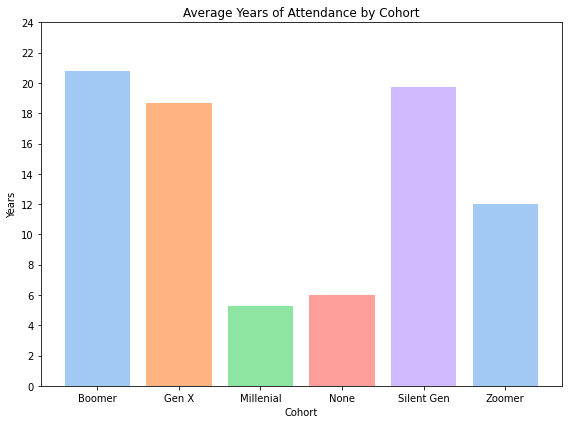

In [11]:
plt.figure(figsize=(8,6), tight_layout=True)
plt.bar(cohort_attend_rate["Cohort"], cohort_attend_rate["Attend"], color=colors[:5])
plt.xlabel("Cohort")
plt.ylabel("Years")
plt.title("Average Years of Attendance by Cohort")
plt.yticks(range(0, 26, 2))
plt.show()

In [12]:
survey["Attend"].describe()

count    63.000000
mean     18.317460
std      15.225971
min       0.830000
25%       5.000000
50%      14.000000
75%      30.000000
max      55.000000
Name: Attend, dtype: float64

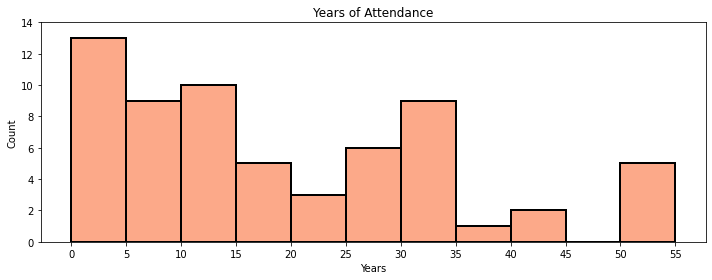

In [13]:
plt.figure(figsize=(10, 4), tight_layout=True)

bins = range(0, 60, 5)
ax = sns.histplot(data=survey, x="Attend", bins=bins, color=sns.color_palette("Set2")[1], linewidth=2)

ax.set(title="Years of Attendance", xlabel="Years", ylabel="Count", xticks=bins, yticks=range(0, 16, 2))
plt.show()

In [14]:
cohort_pivots = []
response_1_value_counts = []

for res in response_1:
    survey.loc[survey["1" + res] == 0, "1" + res] = np.nan
    cohort_pivots.append(survey.pivot_table(values="Age", index="Cohort", columns="1" + res, aggfunc="count"))
    vc = survey["1" + res].value_counts(dropna=True, sort=False).sort_index()
    response_1_value_counts.append(vc)

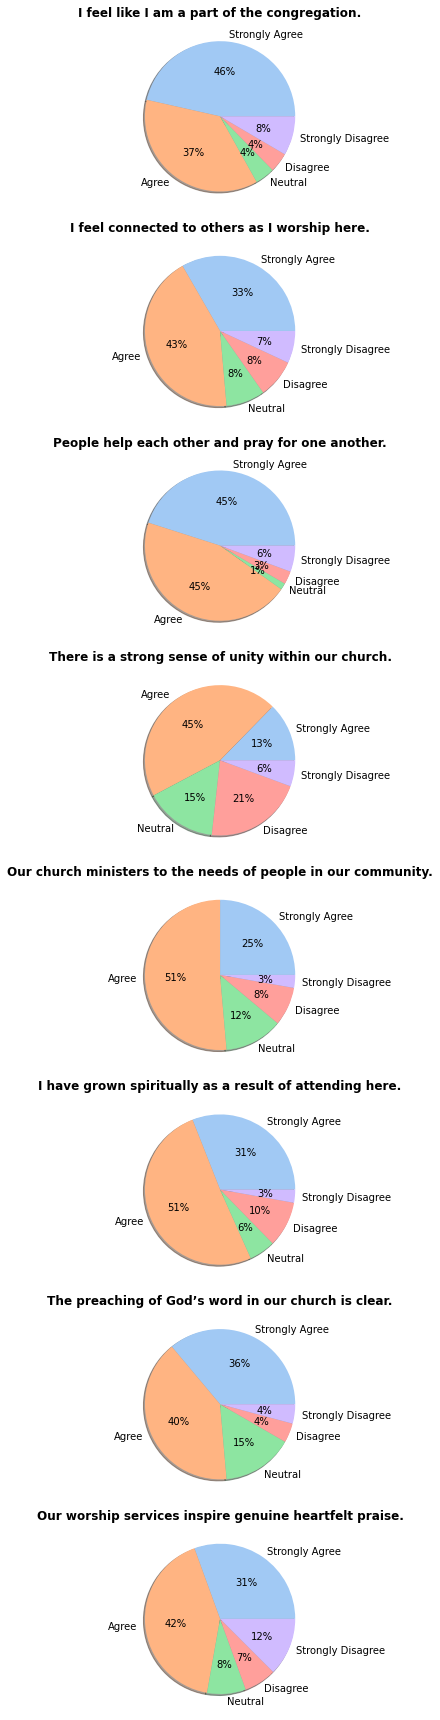

In [15]:
labels = ["Strongly Agree", "Agree", "Neutral", "Disagree", "Strongly Disagree"]
titles = ["I feel like I am a part of the congregation.", 
          "I feel connected to others as I worship here.",
          "People help each other and pray for one another.",
          "There is a strong sense of unity within our church.",
          "Our church ministers to the needs of people in our community.",
          "I have grown spiritually as a result of attending here.",
          "The preaching of God’s word in our church is clear.",
          "Our worship services inspire genuine heartfelt praise."
         ]
fig, ax = plt.subplots(8, 1, figsize=(4, 24), tight_layout=True)

for idx, vc in enumerate(response_1_value_counts):
    ax[idx].pie(vc, labels=labels, autopct="%.0f%%", colors=colors, shadow=True)
    ax[idx].set_title(titles[idx], weight="bold")
    
plt.show()

In [25]:
survey["1_AVG"] = survey[["1A", "1B", "1C", "1D", "1E", "1F", "1G", "1H"]].mean(axis=1)
survey["1_AVG"] -= 1
survey["1_AVG"]

0     1.500000
1     0.000000
2     0.375000
3     2.125000
4     1.875000
        ...   
67    0.375000
68    0.875000
69    0.500000
70    0.750000
71    0.142857
Name: 1_AVG, Length: 72, dtype: float64

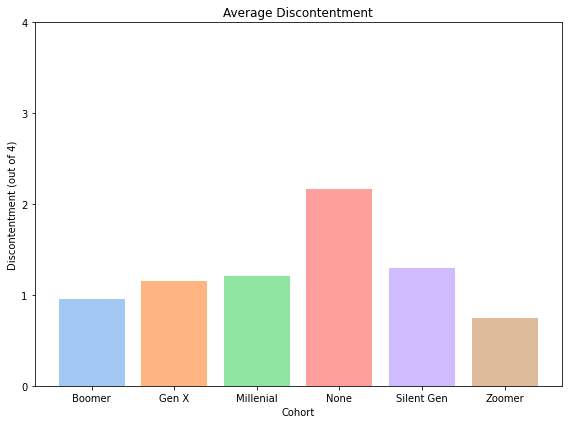

In [28]:
cohort_1_avg = survey.pivot_table(index="Cohort", values="1_AVG")
cohort_1_avg.reset_index(inplace=True)

plt.figure(figsize=(8,6), tight_layout=True)
plt.bar(cohort_1_avg["Cohort"], cohort_1_avg["1_AVG"], color=colors)
plt.xlabel("Cohort")
plt.ylabel("Discontentment (out of 4)")
plt.title("Average Discontentment")
plt.yticks(range(0, 5, 1))
plt.show()

In [52]:
correlation_matrix = survey.corr().abs()
correlation = correlation_matrix.unstack().reset_index()
correlation = correlation.drop(correlation[correlation["level_0"] == correlation["level_1"]].index, axis=0)
# correlation.drop(correlation[correlation[0] < 0.85].index, axis=0)
# correlation.sort_values(by=0)
correlation[correlation[0] >= 0.85].sort_values(by=0)

,level_0,level_1,0
467,1G,1_AVG,0.852489
1493,1_AVG,1G,0.852489
272,1B,1_AVG,0.889098
1488,1_AVG,1B,0.889098
121,Attend,Attend Group,0.922542
159,Attend Group,Attend,0.922542
41,Age,Age Group,0.975709
79,Age Group,Age,0.975709


In [60]:
vc_4 = []
vc_5 = []
vc_6 = []

for res in response_4:
    vc_4.append(survey["4" + res].values.sum())
    
for res in response_5:
    vc_5.append(survey["5" + res].values.sum())
    
for res in response_6:
    vc_6.append(survey["6" + res].values.sum())
    
print(vc_4, vc_5, vc_6)

[35, 20, 11, 9, 7, 7, 25, 11] [23, 41, 22, 6, 4, 23, 16, 25, 16] [15, 20, 34, 15, 7, 12, 7, 33]


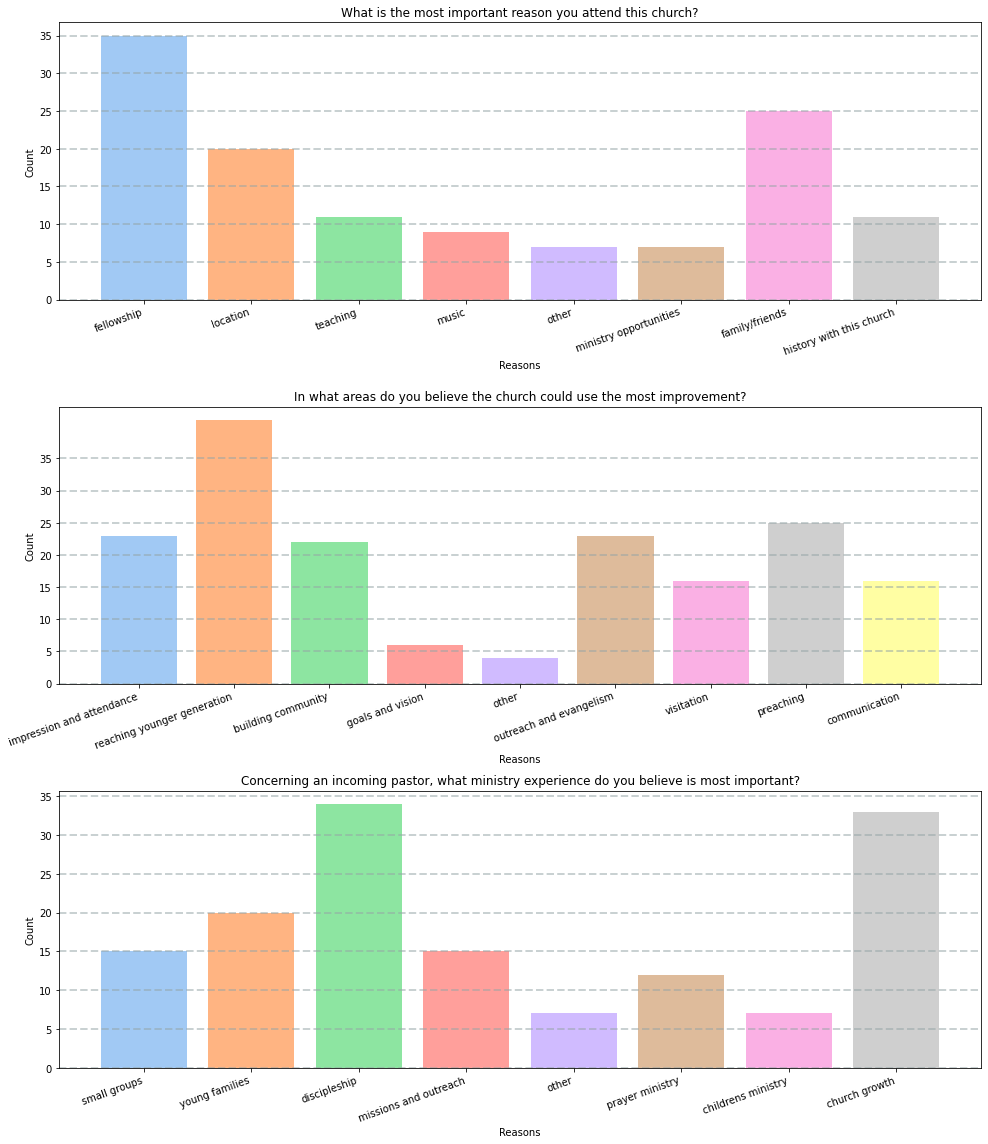

In [88]:
labels_4 = ["fellowship", "location", "teaching", "music", "other", "ministry opportunities", "family/friends", "history with this church"]
labels_5 = ["impression and attendance", "reaching younger generation", "building community", "goals and vision", "other", "outreach and evangelism", "visitation", "preaching", "communication"]
labels_6 = ["small groups", "young families", "discipleship", "missions and outreach", "other", "prayer ministry", "childrens ministry", "church growth"]
q_456 = [vc_4, vc_5, vc_6]
l_456 = [labels_4, labels_5, labels_6]
t_456 = ["What is the most important reason you attend this church?",
        "In what areas do you believe the church could use the most improvement?",
        "Concerning an incoming pastor, what ministry experience do you believe is most important?"]

fig, ax = plt.subplots(3, 1, figsize=(14, 16), tight_layout=True)

for idx, q in enumerate(q_456):
    ax[idx].bar(l_456[idx], q, color=colors)
    ax[idx].grid(color='#95a5a6', linestyle='--', linewidth=2, axis='y', alpha=0.5)
    ax[idx].set_xlabel("Reasons")
    ax[idx].set_ylabel("Count")
    ax[idx].set_title(t_456[idx])
    plt.setp(ax[idx].get_xticklabels(), rotation=20, ha='right')
    ax[idx].set_yticks(range(0, 40, 5))

plt.show()

In [100]:
icons = ["fa-cross", "fa-church", "fa-music", "fa-lightbulb", "fa-pray"]
q_23789 = ["2", "3", "7", "8", "9"]
stop_words = get_stop_words("english")

for idx, q in enumerate(q_23789):
    
    survey[q].to_csv("question_" + q + ".txt", sep=' ', index=False)

    stylecloud.gen_stylecloud(file_path="question_" + q + ".txt", icon_name="fas " + icons[idx],
                              palette="cartocolors.qualitative.Antique_10",
                              background_color="black", output_name="q" + q + ".png", collocations=False,
                              custom_stopwords=stop_words)